## Regression
### Regression is a statistical technique used to understand and model the relationship between a dependent variable and one or more independent variables. The main goal is to predict the value of the dependent variable based on the values of the independent variables


#### Linear Regression

In [3]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
import numpy as np

In [5]:
reviews_data=pd.read_csv("D:/Associate - Junior DS Assessment/Junior (A - L2) Data Science/Data/final_ds_nlp/modified_final_file.csv")

In [13]:
reviews_data = reviews_data.dropna(subset=['raw_rating'])

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the review texts
X = vectorizer.fit_transform(reviews_data['translated_content'])

# Target variable
y = reviews_data['raw_rating']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings for the test set
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(int)
y_pred_clipped = np.clip(y_pred_rounded, 1, 5)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.9245923373766383
R-squared: -0.24809043562308242


In [15]:
# Example new reviews
new_reviews = [
    "The service was fantastic and the staff was very friendly!",
    "The food was terrible and the restaurant was dirty."
]

# Transform the new reviews into the same TF-IDF features
new_reviews_transformed = vectorizer.transform(new_reviews)

# Predict ratings using the trained model
predicted_ratings = model.predict(new_reviews_transformed)

# Display predictions
for review, rating in zip(new_reviews, predicted_ratings):
    print(f"Review: {review}")
    print(f"Predicted Rating: {rating:.2f}")

Review: The service was fantastic and the staff was very friendly!
Predicted Rating: 5.42
Review: The food was terrible and the restaurant was dirty.
Predicted Rating: 1.40


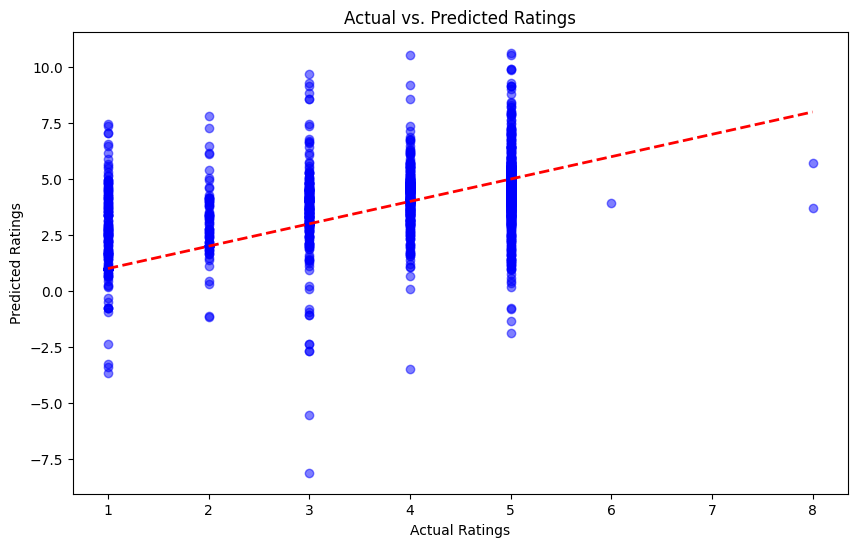

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Diagonal line
plt.show()
